# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 10px; line-height: 1;border-radius:20px"><p>Mohand Amr Mostafa 20200566 </p> <p>Abdelrahman Tarek Ali 20200315</p><p>Afraa Hassan Salem 20200872</p></div>

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">🔍Searching Part</h3>

* [Import Packages and Define Useful Functions](#1)
* [Run it on iris built in dataset](#2)
* [Implement from scratch function: train_validate_test_split ](#3)
* [Draw decision boundaries](#4)
* [Implement function: calculate_accuracy(predicted_y , y)](#5)


<a id="1"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

In [21]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.decomposition import PCA

<a id="2"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">2.Run it on iris built in dataset</div>

In [2]:
iris_data=load_iris()
X = iris_data.data
Y= iris_data.target

<a id="3"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">3-Implement from scratch function: train_validate_test_split 
</div>

In [10]:
def train_validate_test_split(X, y, ratio_test, ratio_val):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    limit_train = int(X.shape[0]-(ratio_test+ratio_val)* X.shape[0])
    limit_val = int(ratio_val* X.shape[0]+limit_train)

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test =train_validate_test_split(X, Y, 0.3, 0.3)

In [11]:
print (X_train.shape[0])
print (y_train.shape[0])
print (X_test.shape[0])
print (y_test.shape[0])
print (X_val.shape[0])
print (y_val.shape[0])


60
60
45
45
45
45


<a id="4"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">4-Draw decision boundaries 
</div>

<AxesSubplot: >

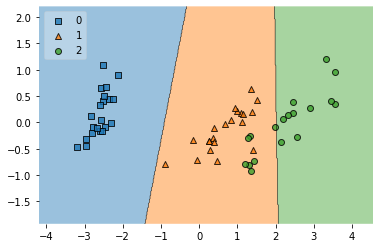

In [22]:
SVM = SVC(kernel="rbf")
SVM = SVC(kernel="poly", C=100, gamma=0.0001)
SVM.fit(X_train, y_train)
SVM = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
SVM.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=SVM, legend=2, )

<a id="5"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">5-Implement function: calculate_accuracy(predicted_y , y)
 
 
</div>

In [35]:
X_train, X_val, X_test, y_train, y_val, y_test =train_validate_test_split(X, Y, 0.4, 0.3)
GaussianNBModel = GaussianNB()

GaussianNBModel.fit(X_train, y_train)
y_predicted=GaussianNBModel.predict(X_test)
yval_predicted=GaussianNBModel.predict(X_val)

In [36]:
def accuracy(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [37]:
accuracy= accuracy(y_test,y_predicted)
accuracy

91.66666666666666